In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics

In [2]:
zoo=pd.read_csv("Zoo.csv")
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
zoo = zoo.rename({'animal name': 'animal_name'}, axis=1)
zoo

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
zoo = pd.get_dummies(zoo, columns = ['animal_name'])
zoo.head(2)


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,animal_name_tuatara,animal_name_tuna,animal_name_vampire,animal_name_vole,animal_name_vulture,animal_name_wallaby,animal_name_wasp,animal_name_wolf,animal_name_worm,animal_name_wren
0,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
zoo_pop = zoo.pop("type")
zoo_pop

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [6]:
zoo_pop.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [7]:
zoo.insert(116, "type", zoo_pop)

In [8]:
zoo

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,animal_name_tuna,animal_name_vampire,animal_name_vole,animal_name_vulture,animal_name_wallaby,animal_name_wasp,animal_name_wolf,animal_name_worm,animal_name_wren,type
0,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,4
3,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,...,0,0,0,0,1,0,0,0,0,1
97,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,1
99,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,7


In [9]:
zoo.type.unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [10]:
array = zoo.values
X = array[:, 0:-1]
Y = array[:,-1]

In [11]:
Y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

In [12]:
X

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 0, 1]], dtype=int64)

In [13]:
zoo['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [14]:
zoo.isna().sum()

hair                0
feathers            0
eggs                0
milk                0
airborne            0
                   ..
animal_name_wasp    0
animal_name_wolf    0
animal_name_worm    0
animal_name_wren    0
type                0
Length: 117, dtype: int64

In [15]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Columns: 117 entries, hair to type
dtypes: int64(17), uint8(100)
memory usage: 23.4 KB


In [16]:
zoo.shape

(101, 117)

<AxesSubplot:>

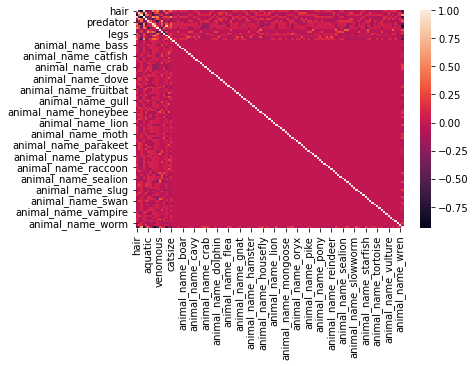

In [17]:
sns.heatmap(zoo.corr())

In [18]:
X=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))
X

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 1.]])

In [19]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,shuffle=True,random_state=1)

C:\Users\kulde\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\kulde\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\kulde\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\kulde\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\kulde\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\kulde\anaconda3\lib\s

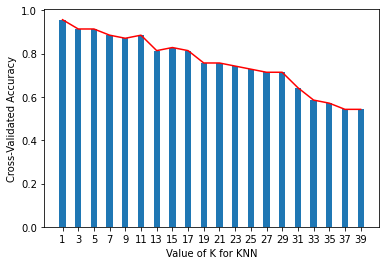

In [20]:
import matplotlib.pyplot as plt 
%matplotlib inline

k_range = [2*i+1 for i in range(0,20)]
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,x_train , y_train, cv=5)
    k_scores.append(scores.mean())

plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores,color="red")

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)

plt.show()

In [21]:
np.argmax(k_scores)

0

In [22]:
k_range[0]

1

In [23]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)
preds = model.predict(x_test)
preds_train = model.predict(x_train)


In [24]:
metrics.accuracy_score(preds_train,y_train)

1.0

In [25]:
metrics.accuracy_score(preds,y_test)

0.967741935483871

In [26]:
model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(x_train,y_train)
preds=model2.predict(x_test)
preds_train = model2.predict(x_train)

In [27]:
metrics.accuracy_score(preds_train,y_train)

0.9571428571428572

In [28]:
metrics.accuracy_score(preds,y_test)

0.967741935483871

In [29]:
model3 = KNeighborsClassifier(n_neighbors=5)
model3.fit(x_train,y_train)
preds=model3.predict(x_test)
preds_train = model3.predict(x_train)

In [30]:
metrics.accuracy_score(preds_train,y_train)

0.9428571428571428

In [31]:
metrics.accuracy_score(preds,y_test)

0.967741935483871

In [32]:
model4 = KNeighborsClassifier(n_neighbors=7)
model4.fit(x_train,y_train)
preds=model4.predict(x_test)
preds_train = model4.predict(x_train)

In [33]:
metrics.accuracy_score(preds_train,y_train)

0.9285714285714286

In [34]:
metrics.accuracy_score(preds,y_test)

0.9354838709677419

In [35]:
model5 = KNeighborsClassifier(n_neighbors=9)
model5.fit(x_train,y_train)
preds=model5.predict(x_test)
preds_train = model5.predict(x_train)

In [36]:
metrics.accuracy_score(preds_train,y_train)

0.9428571428571428

In [37]:
metrics.accuracy_score(preds,y_test)

0.9032258064516129

In [38]:
model6 = KNeighborsClassifier(n_neighbors=11)
model6.fit(x_train,y_train)
preds=model6.predict(x_test)
preds_train = model6.predict(x_train)

In [39]:
metrics.accuracy_score(preds_train,y_train)

0.9

In [40]:
metrics.accuracy_score(preds,y_test)

0.9032258064516129